Step1
Set up environment for the spark and pandas

In [1]:
import pandas as pd
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 9.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=7c9e6d3b1c4398061158771d40f1dc75e0c51573ce9924934dd415520c3a3c97
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The followin

Step2 Generate 1000 randoms number to form an array to computing.


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd

# random lifetime in minutes for N = 1000
data_arr = [ np.random.randint(1000,2000) for i in range(1000) ]
print(data_arr)





[1515, 1760, 1610, 1759, 1550, 1912, 1199, 1103, 1423, 1389, 1535, 1547, 1675, 1994, 1861, 1840, 1435, 1115, 1130, 1450, 1622, 1506, 1977, 1974, 1607, 1265, 1870, 1578, 1090, 1136, 1019, 1362, 1442, 1715, 1509, 1566, 1861, 1885, 1191, 1592, 1444, 1310, 1855, 1122, 1631, 1750, 1959, 1967, 1345, 1985, 1018, 1377, 1687, 1418, 1171, 1612, 1328, 1589, 1139, 1742, 1837, 1766, 1966, 1091, 1213, 1180, 1024, 1759, 1101, 1321, 1243, 1456, 1690, 1623, 1575, 1786, 1016, 1619, 1357, 1346, 1587, 1554, 1551, 1022, 1473, 1855, 1046, 1643, 1009, 1915, 1718, 1327, 1028, 1194, 1939, 1429, 1736, 1939, 1552, 1563, 1519, 1161, 1987, 1267, 1931, 1302, 1084, 1158, 1481, 1095, 1825, 1777, 1841, 1357, 1583, 1926, 1866, 1418, 1026, 1882, 1601, 1172, 1353, 1171, 1129, 1908, 1360, 1397, 1816, 1872, 1901, 1880, 1851, 1464, 1546, 1962, 1362, 1643, 1496, 1203, 1668, 1385, 1426, 1671, 1913, 1533, 1471, 1930, 1456, 1309, 1965, 1306, 1141, 1310, 1619, 1830, 1813, 1334, 1441, 1176, 1252, 1091, 1690, 1549, 1111, 1600, 115

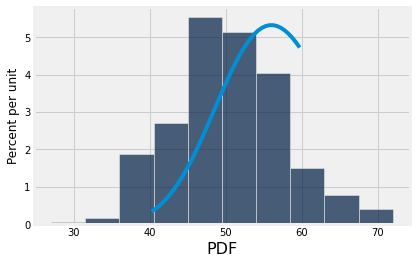

In [80]:
from scipy.stats import poisson
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')

# Random 1000 data in poisson distribution
# and the bulb life time vary from 50 in hours
Pois = Table().with_column('PDF',np.random.poisson(lam=50,size=1000))

Pois.hist()

# the easiest way to calculate the lambda para is to use the mean 
lamb = np.mean((Pois.column(0)))

# for better understand the quality of the mean, we could use PMF (probability mass function)
# to evalate the quality of the lamb in different value

# First the got the biggest and smallest value inside the Pois data array
# And evaluate the PMF for each value
Pois
#likehood
def likihood(lam):
  for k in Pois.column(0):


    arr = poisson.pmf(k=k, mu = lam)
    return np.sum(arr)


# lambdas possibility about mean value
lambs = np.arange(lamb-10,lamb+10,0.5)

# likelihood
mle_arr = make_array()
for lam in lambs:
  #print(lam)
  mle_arr = np.append(mle_arr, likihood(lam))

# plot the PMF for each possible lambda value depend on the simulated data 
plots.plot(lambs, mle_arr)

# from the plot of the curv, looks the PMF lambda value is little bit different than the 
# than the mean value 50 and maybe due to the quality of simulated data